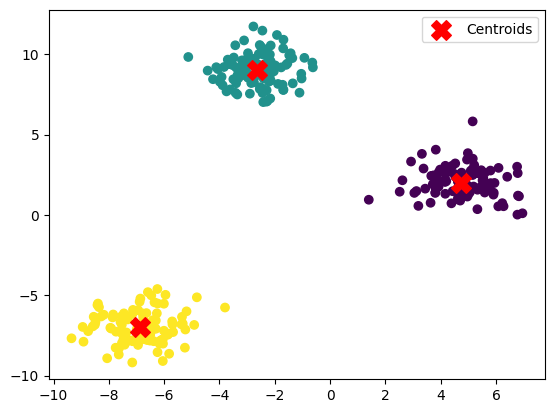

In [1]:
# Question 10: Implementing a Custom Clustering Algorithm
# Description: Design and implement a simple custom clustering algorithm using Python for educational purposes.
import numpy as np
import matplotlib.pyplot as plt

def custom_kmeans(X, k, max_iters=100):
    # Randomly initialize cluster centers
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        # Assign each point to the nearest center
        for i, point in enumerate(X):
            distances = np.linalg.norm(point - centers, axis=1)
            labels[i] = np.argmin(distances)
        
        # Recalculate cluster centers
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        
        centers = new_centers

    return labels, centers

# Generate synthetic data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Apply custom K-Means algorithm
k = 3
labels, centers = custom_kmeans(X, k)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200, label='Centroids')
plt.legend()
plt.show()
